In [1]:
### Basic Classification TensorFlow Beginner 
# Found on https://www.tensorflow.org/tutorials/keras/classification

# Uses the API tf.keras to train a neural network model into identifying
# images of clothing items.

In [3]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.1


In [9]:
# import Fashion MNIST dataset; returns 4 numpy arrays, 2 training & 2 test sets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# map each image to a single label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
### exploring the data
train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

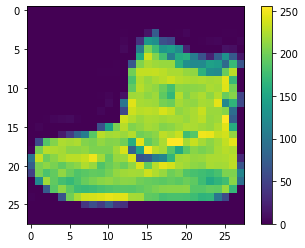

In [18]:
### pre-process data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
# scale pixel values down to range (0,1) to train network
train_images = train_images / 255.0

test_images = test_images / 255.0

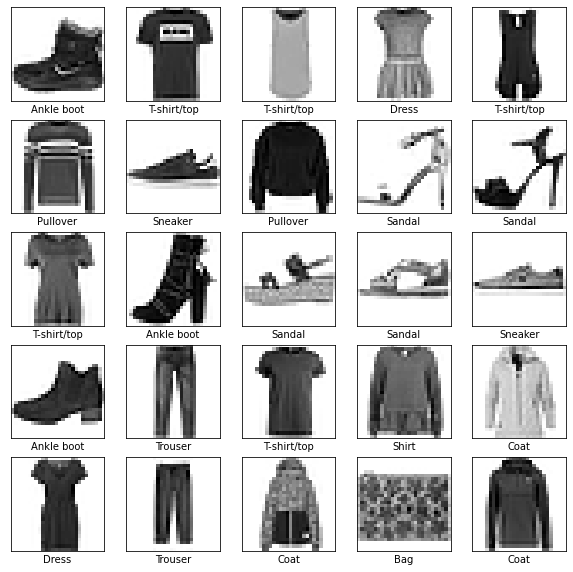

In [21]:
# check first 25 training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
### Build Model
# create layers, which take in representations from the data
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # reformats from 1D to 2D array
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) # 2 fully connected neural layers
])

In [24]:
# change model parameters when compiling
# 1: Loss function: accuracy during training
# 2: Optimizer: how model is updates based on data and loss function
# 3: Metrics: monitors training & testing steps; 'accuracy' used here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
### train model
# feed the model data, it associates images & labels
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 637us/step - loss: 1.0846 - accuracy: 0.6619
Epoch 2/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.6393 - accuracy: 0.7697
Epoch 3/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.5633 - accuracy: 0.7974
Epoch 4/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.5208 - accuracy: 0.81590s - loss: 0.5216 - accuracy: 0.81
Epoch 5/10
1875/1875 [==============================] - 1s 679us/step - loss: 0.4929 - accuracy: 0.8266
Epoch 6/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.4731 - accuracy: 0.8335
Epoch 7/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.4578 - accuracy: 0.8392
Epoch 8/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.4455 - accuracy: 0.8439
Epoch 9/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.4355 - accuracy: 0.8468
Epoch 10/10
1875/1875 [=======

In [26]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4555 - accuracy: 0.8371

Test accuracy: 0.8371000289916992


In [ ]:
# test accuracy < training accuracy --> overfitting

In [27]:
# it makes predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [28]:
predictions[0] # array of 10 numbers, representing "confidence"

array([4.5822651e-07, 4.6719268e-08, 2.6604787e-06, 2.1726541e-06,
       5.2639166e-06, 1.3403119e-01, 4.4697804e-06, 3.3284754e-01,
       2.8233656e-03, 5.3028280e-01], dtype=float32)

In [30]:
np.argmax(predictions[0]) # label with highest confidence

9

In [31]:
test_labels[0] # classification was correct

9

In [33]:
# look at all 10 class predictions

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

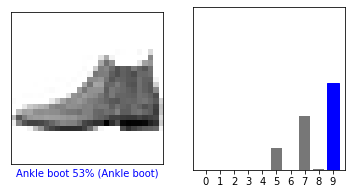

In [34]:
# verify individual predictions; correct = blue, incorrect = red

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

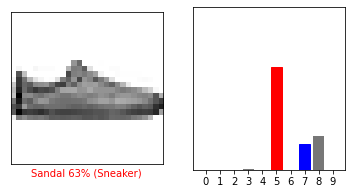

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

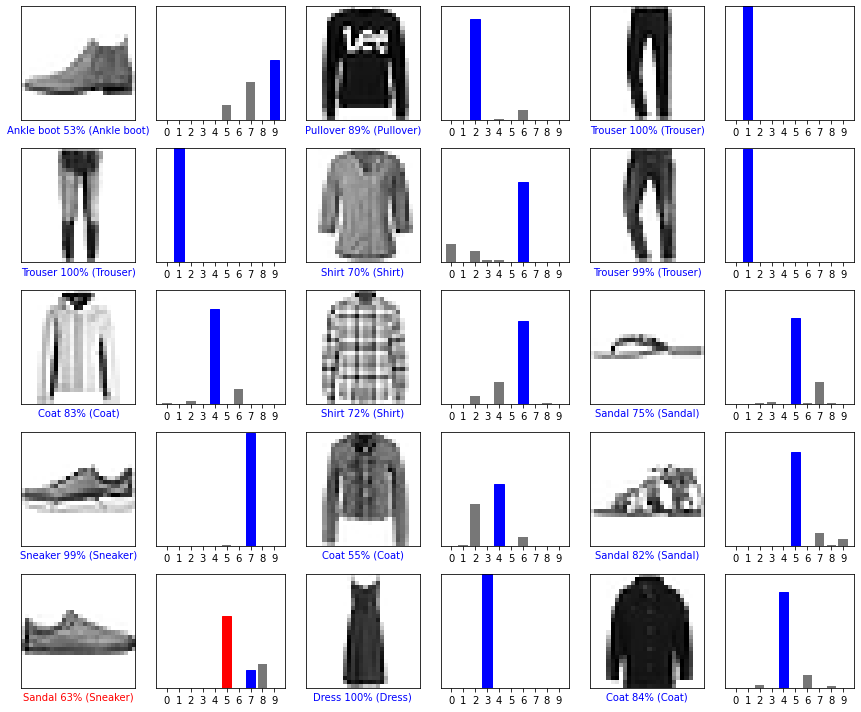

In [37]:
# verify first X test images, their predicted labels, and the true labels 
# (can be wrong with strong confidence values)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [38]:
### Use trained model
# use for single test image

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [39]:
# add image to a batch (collection of examples) where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
# make prediction
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.3167087e-04 2.2423010e-05 8.9086193e-01 1.4139339e-04 1.3384253e-02
  6.6091027e-10 9.5006235e-02 2.0818051e-14 1.5193575e-04 1.9325019e-12]]


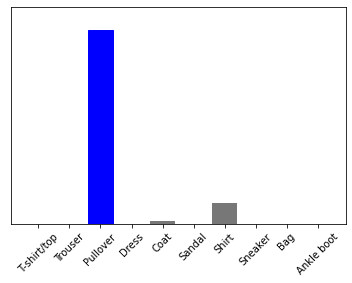

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2

In [43]:
# model correctly predicted label